In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA




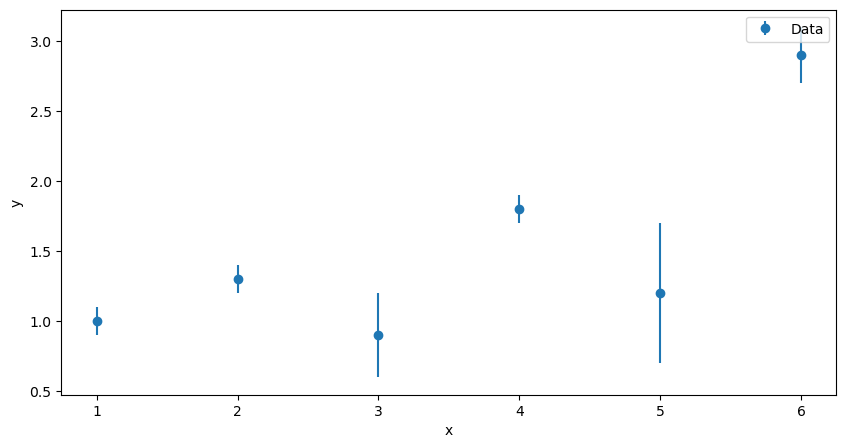

In [2]:


xs = np.array([1., 2., 3., 4., 5., 6.])
ys = np.array([1.0, 1.3, 0.9, 1.8, 1.2, 2.9])
ys_err = np.array([0.1, 0.1, 0.3, 0.1, 0.5, 0.2])

# Plot the data
plt.figure(figsize = (10, 5))
plt.errorbar(xs, ys, yerr=ys_err, fmt='o', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


In [3]:
# Least-square fit with linear algebra on different assumptions

# We want to make the fitting method now

theta =  [1.46216923]
C =  [[0.00294022]]
chi2 =  90.8732440378961


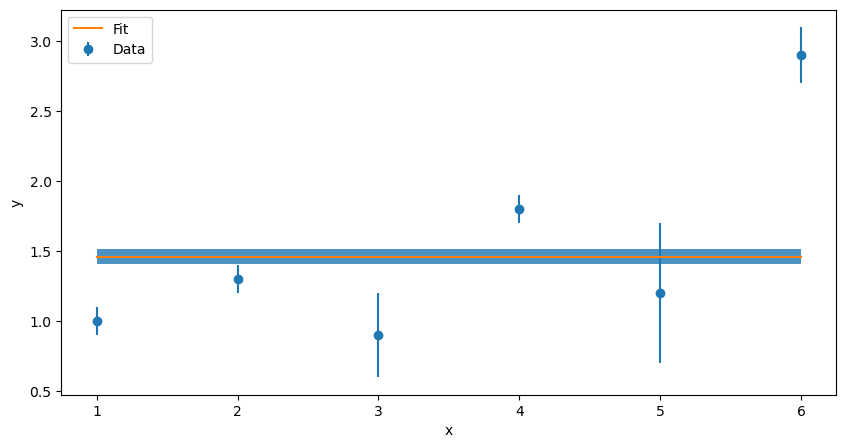

In [10]:
# Constant fit
A = np.ones((len(xs), 1))
V = np.diag(ys_err**2)
V_inv = np.linalg.inv(V)

# Normal equation
A_T = A.T
A_T_V_inv = np.matmul(A_T, V_inv)
A_T_V_inv_A = np.matmul(A_T_V_inv, A)
A_T_V_inv_y = np.matmul(A_T_V_inv, ys)
theta = np.linalg.solve(A_T_V_inv_A, A_T_V_inv_y)
print('theta = ', theta)

# Covariance matrix
C = np.linalg.inv(A_T_V_inv_A)
print('C = ', C)

# Chi-square
chi2 = np.matmul(np.matmul((ys - np.matmul(A, theta)).T, V_inv), (ys - np.matmul(A, theta)))
print('chi2 = ', chi2)





# Want to fill between the two lines
plt.figure(figsize = (10, 5))
plt.errorbar(xs, ys, yerr=ys_err, fmt='o', label='Data')
plt.plot(xs, np.matmul(A, theta), label='Fit')
plt.fill_between(xs, np.matmul(A, theta) + np.sqrt(np.diag(C)), np.matmul(A, theta) - np.sqrt(np.diag(C)), alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



# # Plot the fit
# plt.figure(figsize = (10, 5))
# plt.errorbar(xs, ys, yerr=ys_err, fmt='o', label='Data')
# plt.plot(xs, np.matmul(A, theta), label='Fit')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()



In [17]:
np.matmul(A, theta)
# np.sqrt(np.diag(C))
V00 = C[0][0]
V00

0.011749826608461512

theta =  [0.63900698 0.30992616]
C =  [[ 0.01174983 -0.00331688]
 [-0.00331688  0.00124883]]
chi2 =  13.957692464607723


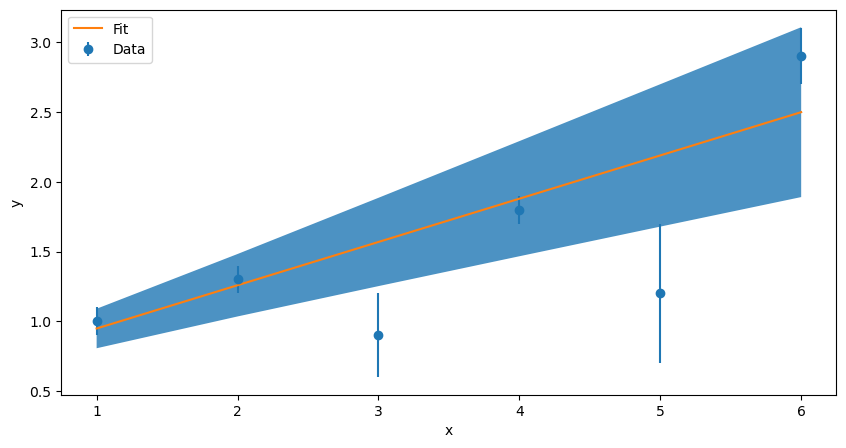

In [19]:
# Straight line fit
# y = a + bx

A = np.ones((len(xs), 2))
A[:, 1] = xs
V = np.diag(ys_err**2)
V_inv = np.linalg.inv(V)

# Normal equation
A_T = A.T
A_T_V_inv = np.matmul(A_T, V_inv)
A_T_V_inv_A = np.matmul(A_T_V_inv, A)
A_T_V_inv_y = np.matmul(A_T_V_inv, ys)
theta = np.linalg.solve(A_T_V_inv_A, A_T_V_inv_y)
print('theta = ', theta)

# Covariance matrix
C = np.linalg.inv(A_T_V_inv_A)
print('C = ', C)

# Chi-square
chi2 = np.matmul(np.matmul((ys - np.matmul(A, theta)).T, V_inv), (ys - np.matmul(A, theta)))
print('chi2 = ', chi2)



# Defining the standard deviation of the fit
sigma = np.sqrt(V[0][0] + xs**2 * V[1][1] + 2 * xs * V[0][1])


# Plotting the uncertainty of the fit
plt.figure(figsize = (10, 5))
plt.errorbar(xs, ys, yerr=ys_err, fmt='o', label='Data')
plt.plot(xs, np.matmul(A, theta), label='Fit')
plt.fill_between(xs, np.matmul(A, theta) + sigma, np.matmul(A, theta) - sigma, alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


# # Plot the fit
# plt.figure(figsize = (10, 5))
# plt.errorbar(xs, ys, yerr=ys_err, fmt='o', label='Data')
# plt.plot(xs, np.matmul(A, theta), label='Fit')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()


C =  [[ 0.04100612 -0.02876961  0.0040756 ]
 [-0.02876961  0.02339248 -0.00354573]
 [ 0.0040756  -0.00354573  0.00056776]]


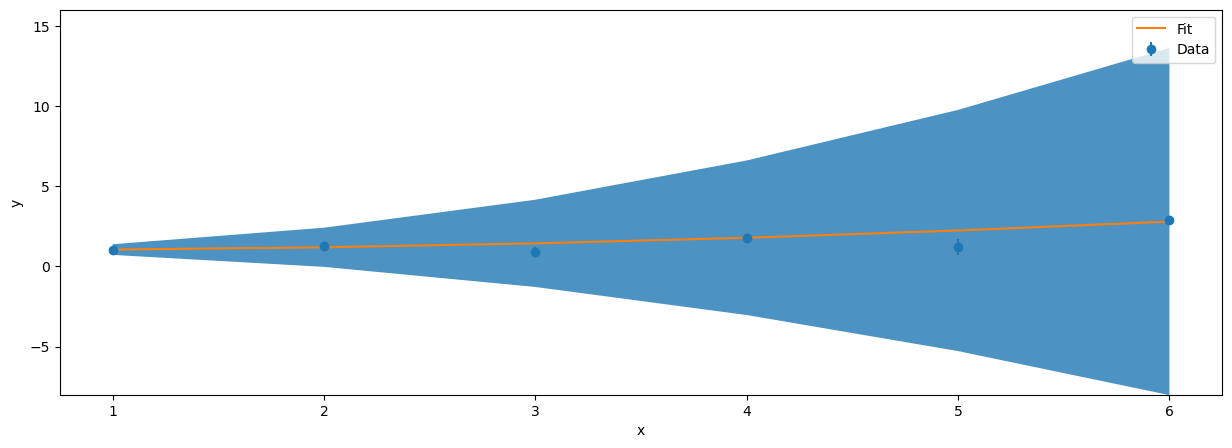

In [30]:
# Quadratic fit
# y = a + bx + cx^2

A = np.ones((len(xs), 3))
A[:, 1] = xs
A[:, 2] = xs**2
V = np.diag(ys_err**2)
V_inv = np.linalg.inv(V)

# Normal equation
A_T = A.T
A_T_V_inv = np.matmul(A_T, V_inv)
A_T_V_inv_A = np.matmul(A_T_V_inv, A)
A_T_V_inv_y = np.matmul(A_T_V_inv, ys)
theta = np.linalg.solve(A_T_V_inv_A, A_T_V_inv_y)

# Covariance matrix
C = np.linalg.inv(A_T_V_inv_A)
print("C = ", C)

# Chi-square
chi2 = np.matmul(np.matmul((ys - np.matmul(A, theta)).T, V_inv), (ys - np.matmul(A, theta)))


# Finding the sigma of the fit
sigma = np.sqrt(V[0][0] + xs**2 * V[1][1] + xs**4 * V[2][2] + 2 * xs * V[0][1] + 2 * xs**2 * V[0][2] + 2 * xs**3 * V[1][2])

# Plotting the uncertainty of the fit
plt.figure(figsize = (15, 5))
plt.errorbar(xs, ys, yerr=ys_err, fmt='o', label='Data')
plt.plot(xs, np.matmul(A, theta), label='Fit')
plt.fill_between(xs, np.matmul(A, theta) + sigma, np.matmul(A, theta) - sigma, alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
# Want to zoom in on the plot
plt.ylim(-8, 16)

plt.legend()


# # Plot the fit
# plt.figure(figsize = (10, 5))
# plt.errorbar(xs, ys, yerr=ys_err, fmt='o', label='Data')
# plt.plot(xs, np.matmul(A, theta), label='Fit')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
